In [1]:
#Necessary libraries for modelling
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install Pillow
!pip install seaborn

In [2]:
!pip install --upgrade scikit-learn

In [934]:
import pandas as pd

In [935]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current Directory:", current_directory)

Current Directory: C:\Users\Bajinamu\Downloads\CODES10-10


In [936]:
import os
import zipfile

def unzip_nested_zip(zip_file_path, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_folder)
    
    print(f"Unzipped '{zip_file_path}' to '{output_folder}'.")
    
    # Check for nested zip files and unzip them recursively
    extracted_files = os.listdir(output_folder)
    for extracted_file in extracted_files:
        extracted_file_path = os.path.join(output_folder, extracted_file)
        if extracted_file_path.endswith('.zip') and zipfile.is_zipfile(extracted_file_path):
            # Recursive call to handle nested zip files
            unzip_nested_zip(extracted_file_path, os.path.splitext(extracted_file_path)[0])

In [937]:
from PIL import Image

In [938]:
import os
from PIL import Image
import numpy as np

# Lists to store images and labels
images = []
labels = []

master_data_path = r"D:\augmentationexper\WhiteNoise\exp04"

def load_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isdir(file_path):
            # If the item is a directory, recursively load images from it
            load_images_from_folder(file_path, filename)
        elif filename.lower().endswith(('png', 'jpg', 'jpeg')):
            # If the item is an image file, load it and add it to the images list
            try:
                with Image.open(file_path) as img:
                    # Convert image to RGB and resize to a consistent size if necessary
                    img = img.convert('RGB').resize((224, 224))  # Example size (224, 224)
                    images.append(np.array(img))  # Convert to numpy array and append
                    labels.append(label)
            except Exception as e:
                print(f'Error loading image {file_path}: {str(e)}')
        else:
            print(f'Skipping non-image file: {file_path}')

# Iterate through folders in the master folder
for folder_name in os.listdir(master_data_path):
    folder_path = os.path.join(master_data_path, folder_name)
    if os.path.isdir(folder_path):
        # Load images and labels from the current folder
        load_images_from_folder(folder_path, folder_name)

# Convert lists to numpy arrays for compatibility with ML models
images = np.array(images)
labels = np.array(labels)

print(f'Images loaded: {images.shape}')
print(f'Labels loaded: {labels.shape}')


Images loaded: (2981, 224, 224, 3)
Labels loaded: (2981,)


In [939]:
import matplotlib.pyplot as plt

FaFv


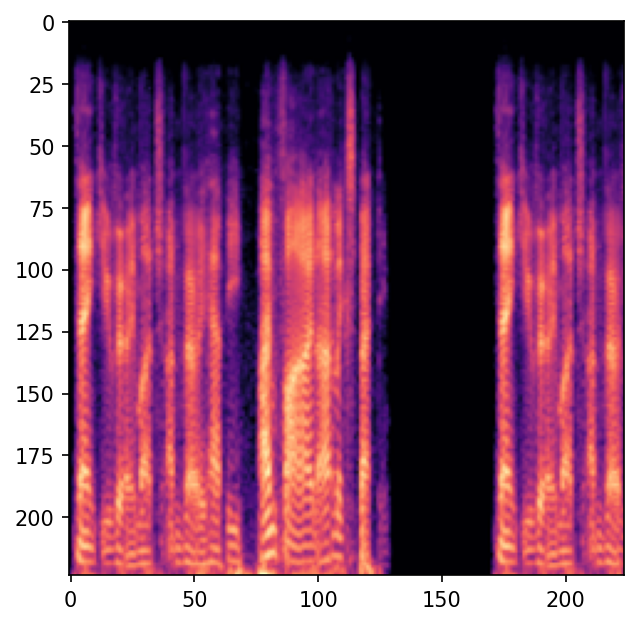

In [940]:
# Iterate through the first two elements of labels and images
for label, image in zip(labels[0:1], images[0:1]):
    print(label)
    plt.imshow(image)
    plt.show()

In [941]:
unique_labels = list(set(labels))
print(unique_labels)

['FaRv', 'FaFv', 'RaRv']


In [942]:
# List to store dimensions of each image
Dimensions = []

# Loop through each image and store its dimensions
for idx, img in enumerate(images):
    # Ensure img has 3 dimensions (height, width, channels)
    if len(img.shape) >= 2:
        height, width = img.shape[:2]
        current_dimension = (width, height)
        Dimensions.append(current_dimension)

# Count unique dimensions
unique_dimension_count = len(set(Dimensions))

print(f'We have images with {unique_dimension_count} unique dimensions')


We have images with 1 unique dimensions


In [943]:
import numpy as np

In [944]:
# Convert PIL images to numpy arrays
numpy_images = [np.array(image) for image in images]

# Resize and convert images to RGB format if necessary
target_size = (224, 224)
reshaped_images = []
for idx, image in enumerate(numpy_images):
    pil_image = Image.fromarray(image)
    pil_image = pil_image.resize(target_size)
    # Convert to RGB if image is grayscale
    if pil_image.mode != 'RGB':
        pil_image = pil_image.convert('RGB')
    reshaped_images.append(np.array(pil_image))

# Shape of reshaped images
for idx, img in enumerate(reshaped_images):
    print(f'Image {idx+1} shape after resizing {img.shape}')

Image 1 shape after resizing (224, 224, 3)
Image 2 shape after resizing (224, 224, 3)
Image 3 shape after resizing (224, 224, 3)
Image 4 shape after resizing (224, 224, 3)
Image 5 shape after resizing (224, 224, 3)
Image 6 shape after resizing (224, 224, 3)
Image 7 shape after resizing (224, 224, 3)
Image 8 shape after resizing (224, 224, 3)
Image 9 shape after resizing (224, 224, 3)
Image 10 shape after resizing (224, 224, 3)
Image 11 shape after resizing (224, 224, 3)
Image 12 shape after resizing (224, 224, 3)
Image 13 shape after resizing (224, 224, 3)
Image 14 shape after resizing (224, 224, 3)
Image 15 shape after resizing (224, 224, 3)
Image 16 shape after resizing (224, 224, 3)
Image 17 shape after resizing (224, 224, 3)
Image 18 shape after resizing (224, 224, 3)
Image 19 shape after resizing (224, 224, 3)
Image 20 shape after resizing (224, 224, 3)
Image 21 shape after resizing (224, 224, 3)
Image 22 shape after resizing (224, 224, 3)
Image 23 shape after resizing (224, 224, 

In [945]:
Dimensions = []

for idx, img in enumerate(reshaped_images):
    width, height, channel = img.shape
    current_dimension = width, height, channel
    Dimensions.append(current_dimension)
    
unique_dimension_count_after_reshaping = len(list(set(Dimensions)))

print(f'Number of unique dimension: {unique_dimension_count_after_reshaping}')

print("Dimension of reshaped_images:", reshaped_images[0].shape)

print("Data type of reshaped_images:", reshaped_images[0].dtype)

Number of unique dimension: 1
Dimension of reshaped_images: (224, 224, 3)
Data type of reshaped_images: uint8


In [946]:
# Convert images to float32 and normalize to [0, 1]
normalized_images = np.array(reshaped_images, dtype=np.float32) / 255.0

# Verify the shape and data type of processed_images
print("Shape of normalized_images:", normalized_images.shape)
print("Data type of processed_images:", normalized_images.dtype)

Shape of normalized_images: (2981, 224, 224, 3)
Data type of processed_images: float32


FaFv


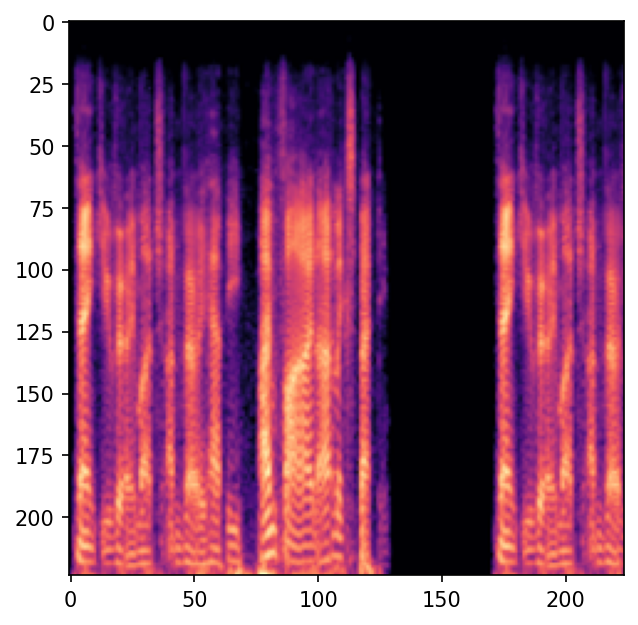

In [947]:
print(labels[0])
plt.imshow(normalized_images[0])
plt.show()

In [948]:
#counting the number of labels in each classes

count_of_classes = {}

for label in labels:
    if label in count_of_classes:
        count_of_classes[label] +=1
    else:
        count_of_classes[label] = 1
        
        
for key, value in count_of_classes.items():
    print(f'{key}:{value}')

FaFv:2081
RaRv:500
FaRv:400


In [949]:
import os
import shutil
from sklearn.utils import resample
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths to your dataset (adjust to your file structure)
fafv_dir = R'D:\augmentationexper\WhiteNoise\exp04\training\fake\FaRv'  # Folder containing FaFv (fake) images
rarv_dir = R'D:\augmentationexper\WhiteNoise\exp04\training\real\RaRv'  # Folder containing RaRv (real) images
undersampled_dir =  R'D:\augmentationexper\WhiteNoise\exp04\undersampled'   # Directory to save undersampled dataset

# Count the number of images in each class
num_fafv = len(os.listdir(fafv_dir))
num_rarv = len(os.listdir(rarv_dir))

print(f"Number of FaFv images: {num_fafv}")
print(f"Number of RaRv images: {num_rarv}")

# Function to undersample the majority class (FaFv) to match RaRv's image count
def undersample_class(source_dir, target_dir, num_samples):
    os.makedirs(target_dir, exist_ok=True)  # Create target directory if it doesn't exist
    image_files = os.listdir(source_dir)
    
    # Randomly select 'num_samples' images from the majority class
    sampled_files = resample(image_files, n_samples=num_samples, random_state=42)
    
    # Copy the sampled files to the undersampled directory
    for file in sampled_files:
        shutil.copy(os.path.join(source_dir, file), target_dir)

# Create directories for the balanced dataset
undersample_class(fafv_dir, os.path.join(undersampled_dir, 'FaRv'), num_rarv)  # Undersample FaFv to match RaRv count
shutil.copytree(rarv_dir, os.path.join(undersampled_dir, 'RaRv'))  # Copy RaRv (no undersampling needed)

print(f"Undersampled dataset created with {num_rarv} FaRv and {num_rarv} RaRv images.")   

# Initialize empty lists to store processed images and corresponding labels
processed_images = []
processed_labels = []

# Load images and labels from the undersampled dataset
for class_name in ['FaRv', 'RaRv']:
    class_dir = os.path.join(undersampled_dir, class_name)
    label = 0 if class_name == 'RaRv' else 1  # Label real as 0 and fake as 1

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Load and preprocess the image
        img = load_img(img_path, target_size=(224, 224))  # Adjust size as needed
        img_array = img_to_array(img)
        processed_images.append(img_array)
        processed_labels.append(label)

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(processed_labels)

# Initialize OneHotEncoder with sparse_output=False instead of sparse=True
onehot_encoder = OneHotEncoder(sparse_output=False)  # Change sparse to sparse_output
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded_labels = onehot_encoder.fit_transform(integer_encoded_labels)

# Convert processed_images and onehot_encoded_labels to numpy arrays
processed_images = np.array(processed_images)
onehot_encoded_labels = np.array(onehot_encoded_labels)

# Save processed_images and onehot_encoded_labels in the current directory
np.save("processed_images_fr.npy", processed_images)
np.save("onehot_encoded_labels_fr.npy", onehot_encoded_labels)

# Verify the shapes of processed_images and onehot_encoded_labels
print("Shape of processed_images:", processed_images.shape)
print("Shape of onehot_encoded_labels:", onehot_encoded_labels.shape)


Number of FaFv images: 400
Number of RaRv images: 400
Undersampled dataset created with 400 FaRv and 400 RaRv images.
Shape of processed_images: (638, 224, 224, 3)
Shape of onehot_encoded_labels: (638, 2)


In [950]:

from tensorflow.keras.applications import EfficientNetB0

In [951]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [952]:
shape=(224, 224, 3)

In [953]:
base_model_1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=shape)

In [954]:
base_models = [base_model_1]

In [955]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(base_models):
    print(f'Summary of Base Model {idx +1}:')
    model.summary()

Summary of Base Model 1:


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_108 (InputLayer)  │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_10 (Rescaling)      │ (None, 224, 224, 3)       │               0 │ input_layer_108[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_5               │ (None, 224, 224, 3)       │               7 │ rescaling_10[0][0]         │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_11 (Rescaling)      │ (None, 224, 224, 3)       │               0 │ normalization_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_11[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [956]:
#Freezing the pre-trained model's last layer for transfer learning
for model in base_models:
    for layer in model.layers:
        layer.trainable=False

In [957]:
base_models = [base_model_1]

custom_models = []

for idx, model in enumerate(base_models):
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    custom_model = Model(inputs=model.input, outputs=predictions)
    custom_models.append(custom_model)
    print(f"Customized the model - {idx+1}")

Customized the model - 1


In [958]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(custom_models):
    print(f'Summary of Custom Model {idx +1}:')
    model.summary()

Summary of Custom Model 1:


Model: "functional_233"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_108 (InputLayer)  │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_10 (Rescaling)      │ (None, 224, 224, 3)       │               0 │ input_layer_108[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_5               │ (None, 224, 224, 3)       │               7 │ rescaling_10[0][0]         │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_11 (Rescaling)      │ (None, 224, 224, 3)       │               0 │ normalization_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_11[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 68,277,925 (260.46 MB)

 Trainable params: 64,228,354 (245.01 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [959]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

Compiled Custom Model 1


In [960]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [961]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_images, onehot_encoded_labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (510, 224, 224, 3)
Shape of y_train: (510, 2)
Shape of X_test: (128, 224, 224, 3)
Shape of y_test: (128, 2)


In [962]:
model_names = ["EfficientNetB0"]
class_labels = ['RaRv', 'FaRv']

In [963]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import os

def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100, class_labels=None, output_dir='pred_images_gnexp3'):
    results = []
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint(f'{model_name}_model_FR.keras', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 5 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, callbacks=[checkpoint, early_stopping])
        
        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy:.2f}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch + 1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Generate predictions
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Generate classification report
        class_report = classification_report(y_true, y_pred, target_names=class_labels)
        print(f"Classification Report for {model_name}:\n{class_report}")

        # Display predictions for the first few test images
        display_predictions(X_test, y_true, y_pred, class_labels)

        # Save predicted images
        save_predicted_images(X_test, y_pred, class_labels, output_dir)

        # Apply Grad-CAM
        apply_grad_cam(model, X_test, y_pred, class_labels)

    return results

def display_predictions(X_test, y_true, y_pred, class_labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        
        # Normalize the image if it’s not in the 0-1 range
        img = X_test[i]
        if img.max() > 1.0:
            img = img / 255.0
            
        plt.imshow(img)
        plt.title(f'True: {class_labels[y_true[i]]}\nPredicted: {class_labels[y_pred[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def save_predicted_images(X_test, y_pred, class_labels, output_dir):
    for i in range(len(X_test)):
        # Prepare the filename
        class_label = class_labels[y_pred[i]]
        filename = f'{class_label}_image_{i}.png'  # Customize filename as needed
        filepath = os.path.join(output_dir, filename)

        # Normalize the image if it’s not in the 0-1 range
        img = X_test[i]
        if img.max() > 1.0:
            img = img / 255.0
        
        # Save the image
        plt.imsave(filepath, img)  # Use plt.imsave to save the image


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.7238 - loss: 1.3865
Epoch 1: val_accuracy improved from -inf to 0.92188, saving model to EfficientNetB0_model_FR.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7290 - loss: 1.3703 - val_accuracy: 0.9219 - val_loss: 0.5773
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.9595 - loss: 0.2116
Epoch 2: val_accuracy improved from 0.92188 to 0.94531, saving model to EfficientNetB0_model_FR.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9593 - loss: 0.2114 - val_accuracy: 0.9453 - val_loss: 0.2254
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.9631 - loss: 0.1755
Epoch 3: val_accuracy did not improve from 0.94531
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9633 - loss: 0.1744 - val_accuracy: 0.9297 - val_loss: 0.1854
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.9896 - loss: 0.0364
Epoch 4: val_accuracy did not improve from 0.94531
16/1

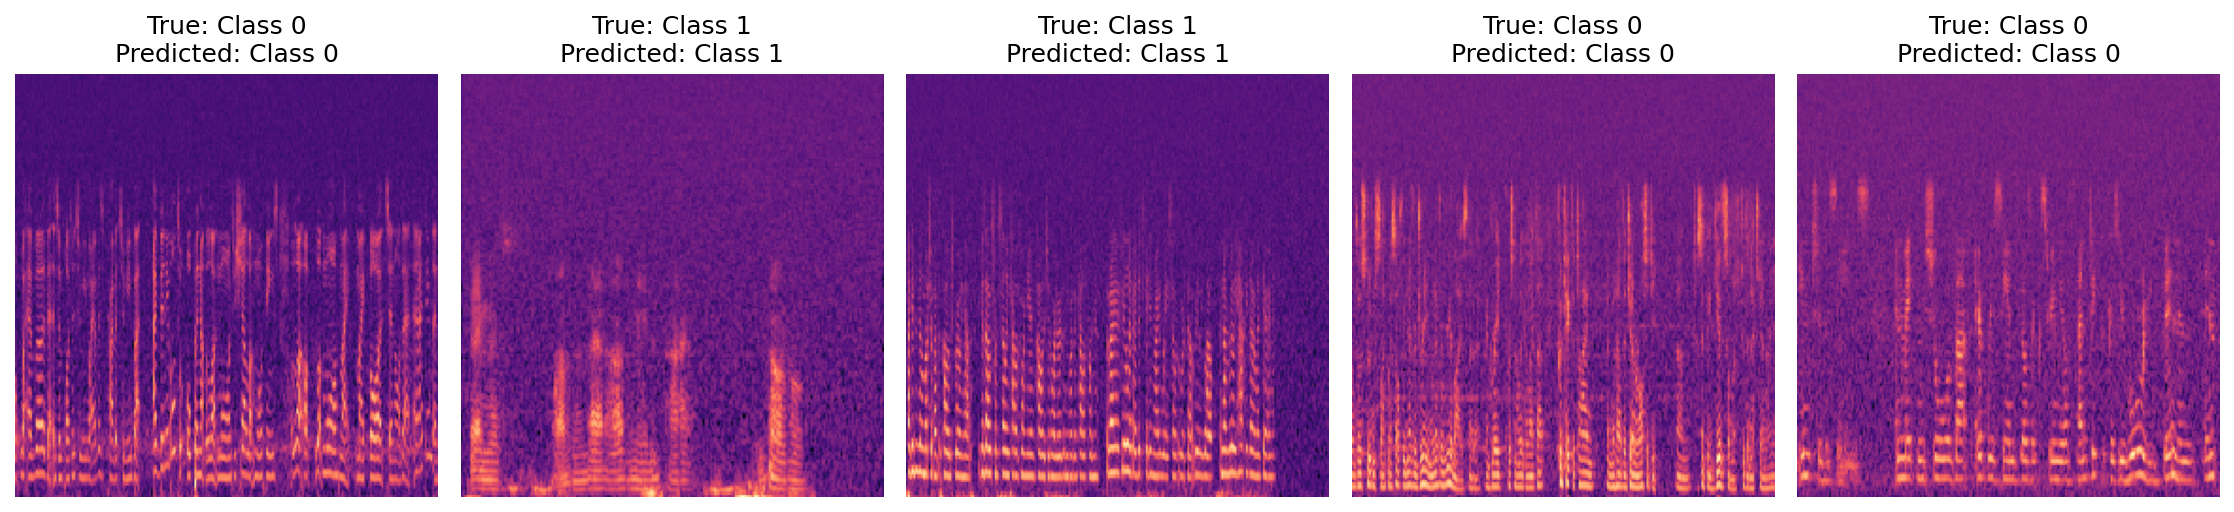

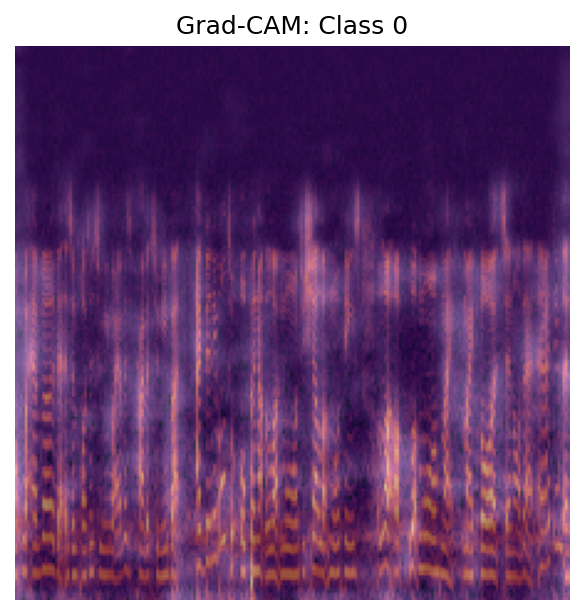

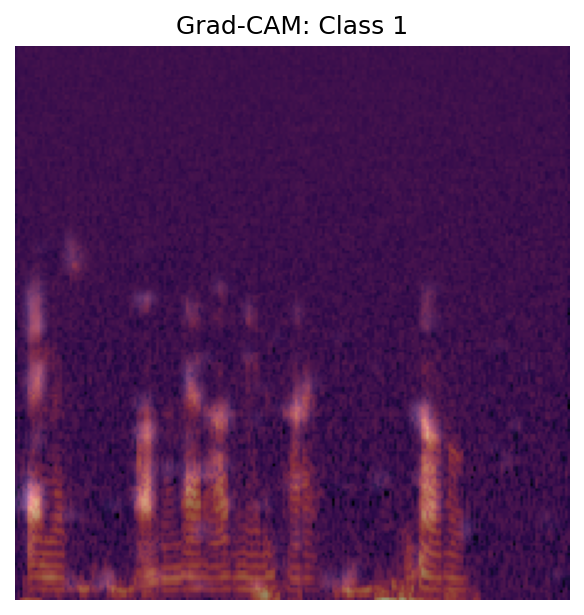

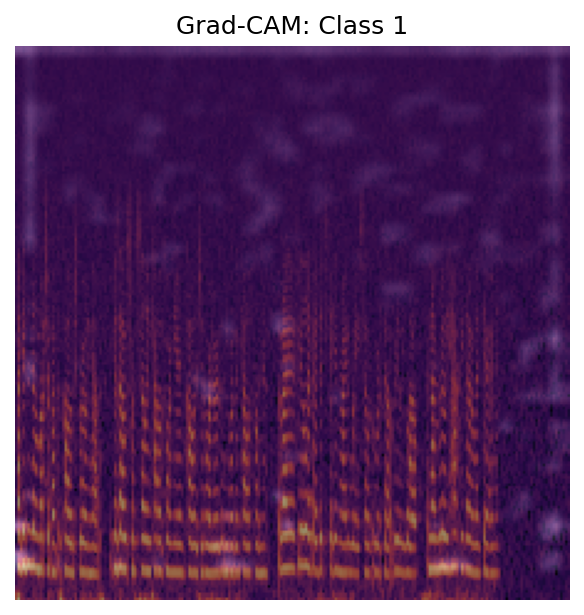

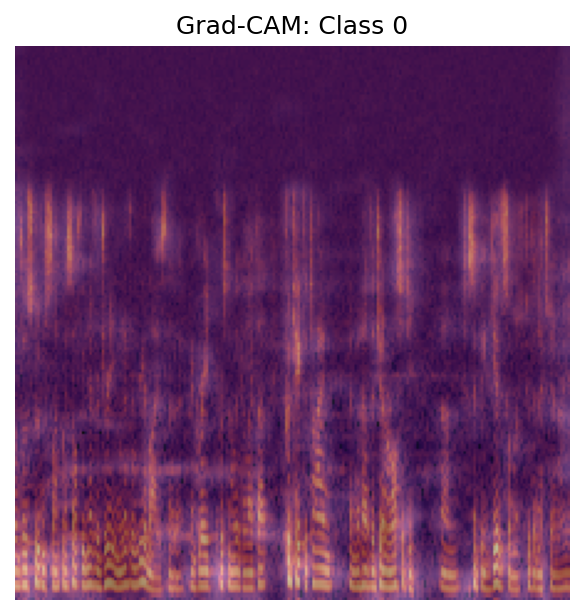

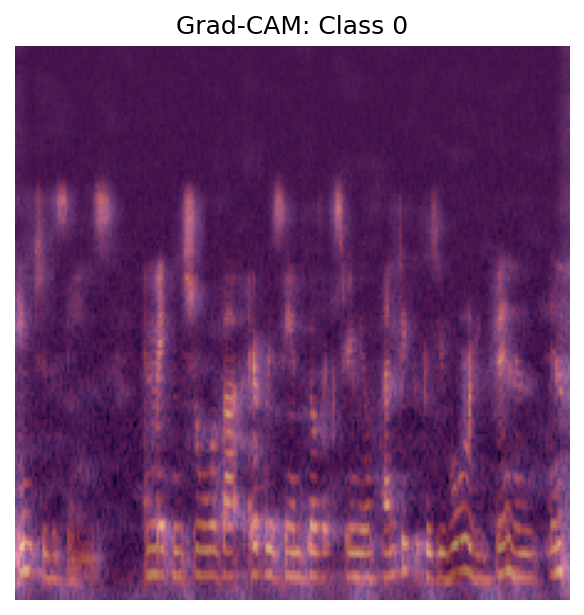

In [964]:
# Example class labels (should match your dataset)
class_labels = ['Class 0', 'Class 1']  # Adjust according to your dataset

# Assuming you pass it correctly in the function call
results = train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100, class_labels=class_labels)


In [965]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

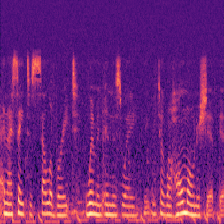

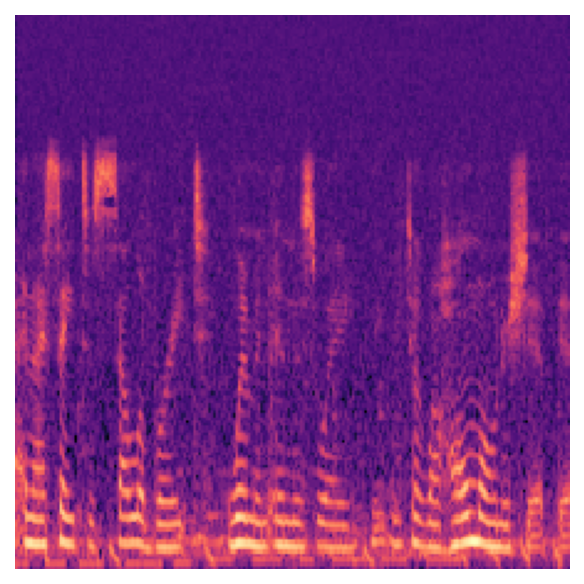

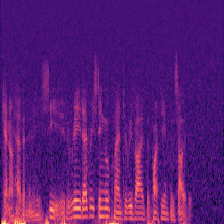

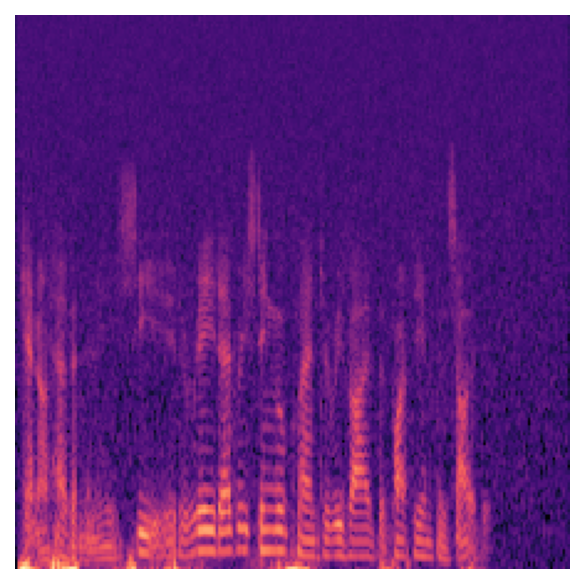

In [966]:
from tensorflow import keras
from IPython.display import Image, display
import os
import matplotlib.pyplot as plt
from PIL import Image as PILImage

# Define the EfficientNetB0 model and related functions
model_builder = keras.applications.efficientnet.EfficientNetB0
img_size = (224, 224)  # Image size for EfficientNetB0
preprocess_input = keras.applications.efficientnet.preprocess_input
decode_predictions = keras.applications.efficientnet.decode_predictions

# List of local paths to your target images
image_paths = [
    r"C:\Users\Bajinamu\Downloads\CODES10-10\pred_images_gnexp3\Class 0_image_87.PNG",
    r"C:\Users\Bajinamu\Downloads\CODES10-10\pred_images_gnexp3\Class 1_image_34.PNG",
]

# Loop through each image path and display the image
for img_path in image_paths:
    if os.path.exists(img_path):  # Check if the path exists
        try:
            # Display image in a Jupyter Notebook
            display(Image(img_path))  # Works only in Jupyter Notebook

            # Display image using PIL and matplotlib for script environments
            img = PILImage.open(img_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error displaying image at {img_path}: {e}")
    else:
        print(f"Image path does not exist: {img_path}")


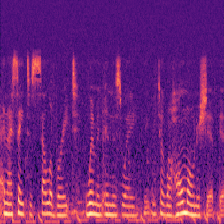

C:\Users\Bajinamu\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_4730']. Received: the structure of inputs=*
  warnings.warn(


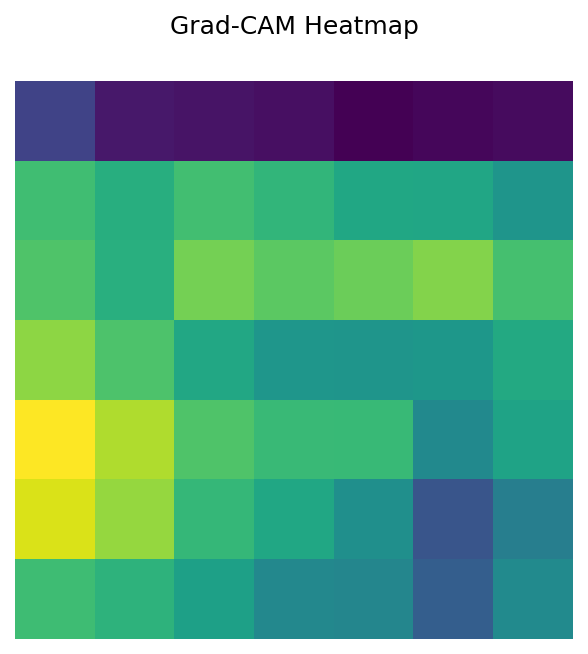

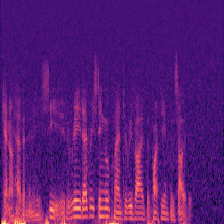

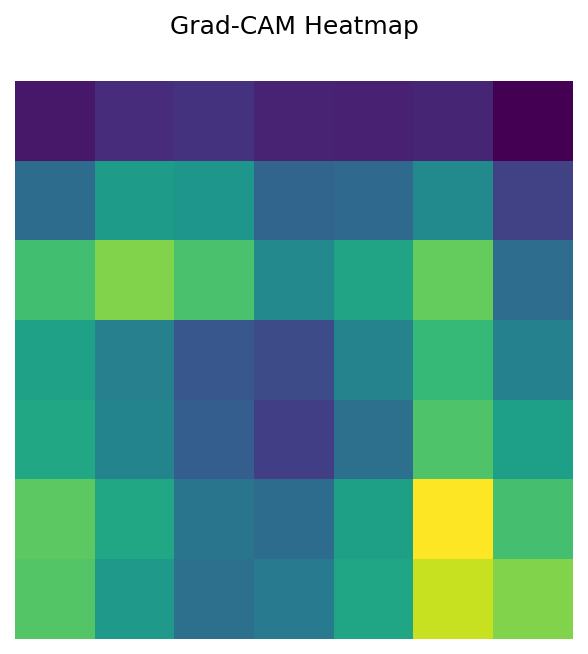

In [967]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Function to load and preprocess the image
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return preprocess_input(array)

# Function to generate Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Load the EfficientNetB0 model
model = EfficientNetB0(weights='imagenet')
last_conv_layer_name = "top_conv"  # EfficientNetB0's last convolutional layer
img_size = (224, 224)  # EfficientNetB0 input size

# List of local paths to your target images
image_paths = [
    r"C:\Users\Bajinamu\Downloads\CODES10-10\pred_images_gnexp3\Class 0_image_87.PNG",
    r"C:\Users\Bajinamu\Downloads\CODES10-10\pred_images_gnexp3\Class 1_image_34.PNG",
    # Add more image paths as needed
]

# Loop through each image path to display and generate Grad-CAM
for img_path in image_paths:
    display(Image(img_path))

    # Load and preprocess image
    img_array = get_img_array(img_path, img_size)

    # Generate the heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display the heatmap
    plt.matshow(heatmap)
    plt.axis('off')
    plt.title('Grad-CAM Heatmap')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


C:\Users\Bajinamu\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_4971']. Received: the structure of inputs=*
  warnings.warn(
C:\Users\Bajinamu\AppData\Local\Temp\ipykernel_9292\3598202598.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


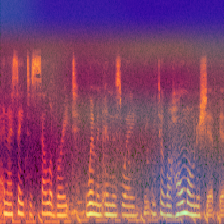

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


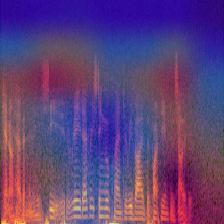

In [968]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Image, display
import os

# Initialize the EfficientNetB0 model
model = EfficientNetB0(weights='imagenet')
last_conv_layer_name = "top_conv"  # Last conv layer in EfficientNetB0
img_size = (224, 224)  # EfficientNetB0 input size

# Function to load and preprocess the image
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return preprocess_input(array)

# Function to generate Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to save and display Grad-CAM
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Create a new save path
    base_filename = os.path.basename(img_path)
    cam_path = os.path.join("C:\\Users\\Bajinamu\\Downloads\\CODES10-10", f"gradcam_{base_filename}")

    # Save and display the superimposed image
    superimposed_img.save(cam_path)
    display(Image(cam_path))

# Process each image
image_paths = [
      r"C:\Users\Bajinamu\Downloads\CODES10-10\pred_images_gnexp3\Class 0_image_87.PNG",
      r"C:\Users\Bajinamu\Downloads\CODES10-10\pred_images_gnexp3\Class 1_image_34.PNG",
]

for img_path in image_paths:
    # Prepare image
    img_array = get_img_array(img_path, size=img_size)

    # Get predictions
    preds = model.predict(img_array)
    pred_index = tf.argmax(preds[0]).numpy()

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index)

    # Save and display Grad-CAM
    save_and_display_gradcam(img_path, heatmap)
